# TCC
### Algoritimo de classificação KNN, ou de vizinhos próximos

In [2]:
#Vou instanciar, treinar e otimizar os parâmetros somente do algoritimo do tipo KNN
# Começando pelos imports necessários para a produção do algoritimo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import DistanceMetric

In [3]:
#Importando a base de dados
base = pd.read_excel('base_10_steps.xlsm')

In [4]:
#imprimindo e verificando a base
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,Fcc,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,Fcc,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,Fcc,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,Fcc,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Verificando quantas "classes" há na coluna de fases
base['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma', 'Fcc+Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Sigma', 'Fcc+Bcc', 'Bcc+Fcc', 'Bcc', 'MnNi_Beta+Fcc',
       'Bcc+MnNi_Beta', 'Sigma+Fcc+MnNi_Beta', 'Bcc+Sigma',
       'Bcc+Fcc+Sigma', 'MnNi_Beta+Bcc', 'Bcc+MnNi_Beta+Sigma',
       'MnNi_Beta+Bcc+Fcc', 'Fcc+CUB_A13', 'Sigma+CUB_A13',
       'Fcc+Bcc+Sigma', 'CUB_A13+Sigma+Fcc'], dtype=object)

In [6]:
#criação de dicionário
valores_de_fase = { 'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
       'CUB_A13+Sigma':3, 'Fcc+Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
       'Sigma+Fcc':3, 'Sigma':2, 'Fcc+Bcc':3, 'Bcc+Fcc':3, 'Bcc':1, 'MnNi_Beta+Fcc':3,
       'Bcc+MnNi_Beta':3, 'Sigma+Fcc+MnNi_Beta':3, 'Bcc+Sigma':3,
       'Bcc+Fcc+Sigma':3, 'MnNi_Beta+Bcc':3, 'Bcc+MnNi_Beta+Sigma':3,
       'MnNi_Beta+Bcc+Fcc':3, 'Fcc+CUB_A13':3, 'Sigma+CUB_A13':3,
       'Fcc+Bcc+Sigma':3, 'CUB_A13+Sigma+Fcc':3
    
}

In [7]:
#Mudando os nomes das fases pelos números correspondentes

base['phase_name'] = base['phase_name'].map(valores_de_fase)

In [8]:
#verificando substituição dos valores na coluna das fases
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Substituindo os valores vazios por zero

base = base.fillna(0)
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,0.0,0.0,0.0,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,0.0,0.0,0.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,0.0,0.0,0.0,9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,0.0,0.0,0.0,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Criando bases de Features e Resposta

x = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y= base[['phase_name']]

In [11]:
#Fazendo separação para treino e teste usando a divisão mais simples de train_test_split 
#Como o modelo a ser utilizado é o KNN, é preciso trabalhar na normalização dos dados com o StandatScaler
# A normalização serve para deixar todas as variaveis em uma mesma base

SEED = 10
#Normalização da escala dos dados de features
normalizador = StandardScaler()
normalizador2 = StandardScaler()
normalizador3 = StandardScaler()

x_normalizado = normalizador.fit_transform(x)
x_normalizado_2 = normalizador2.fit_transform(x_2)
x_normalizado_3 = normalizador3.fit_transform(x_3)

#Divisião inicial apenas com a base de features x

x_treino, x_teste, y_treino,y_teste =  train_test_split(x_normalizado, np.ravel(y),
                                                                       test_size=0.25, random_state=SEED)



In [12]:
# Utilização de um Dummy classifier para ter uma mínima baseline

Dummy = DummyClassifier(strategy='stratified',random_state=SEED)

Dummy.fit(x_treino,y_treino)
previsao_dummy = Dummy.predict(x_teste)

acuracia_dummy = accuracy_score(y_teste,previsao_dummy)

print('A acurácia do modelo "Bobo" foi de %.2f' % (acuracia_dummy*100),'%')


A acurácia do modelo "Bobo" foi de 49.40 %


In [13]:
# Instanciamento inicial do modelo KNN

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')

#treino do modelo, com a base de treino
knn.fit(x_treino, y_treino)
#aplicação inicial do modelo com a base de treino
previsao_knn = knn.predict(x_teste)
#medição do acerto (acurácia do modelo)
acuracia_knn = accuracy_score(y_teste, previsao_knn)
#impressão da acurácia
print('A acurácia do modelo knn foi de {0:.2f}'.format(acuracia_knn*100))

A acurácia do modelo knn foi de 91.24


In [30]:
#Verificação de ocorrencia de cada classe na partição de teste
ocorrencia_fases = pd.DataFrame(y_teste)
ocorrencia_fases= ocorrencia_fases.rename(columns={0:"fases"})
ocorrencia_fases = ocorrencia_fases.groupby(['fases']).size()
ocorrencia_fases

fases
0    150
1     18
2      6
3     77
dtype: int64

In [31]:
#Matriz de confusão inicial para visualizar os acertos e erro do modelo

matriz_de_confusao0 = confusion_matrix(y_teste,previsao_knn)
matriz_de_confusao0

array([[148,   0,   0,   2],
       [  0,  18,   0,   0],
       [  0,   0,   3,   3],
       [ 12,   3,   2,  60]], dtype=int64)

# Validação cruzada do modelo
### Tratativas e processos para uma validação cruzada

In [32]:
# vou realizar a validação cruzada para o modelo knn

resultados_knn = cross_validate(knn, x_normalizado, np.ravel(y), cv=10)
resultados_knn

{'fit_time': array([0.0029912 , 0.00199437, 0.00299335, 0.00199342, 0.00398827,
        0.0029912 , 0.0039885 , 0.00399041, 0.00199199, 0.00398898]),
 'score_time': array([0.01097178, 0.01096988, 0.01196814, 0.00698209, 0.01398087,
        0.00797915, 0.01097274, 0.01097059, 0.0089767 , 0.01096725]),
 'test_score': array([0.7029703, 0.89     , 0.92     , 0.75     , 0.81     , 0.81     ,
        0.85     , 0.8      , 0.78     , 0.71     ])}

In [33]:
#Agora os cálculos da média e desvio padrão com as informações do tes_score
media_knn = resultados_knn['test_score'].mean()
desvio_knn = resultados_knn['test_score'].std()
print('A acurácia utilizando o modelo knn de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_knn*100
                                                                                        ,desvio_knn*100))

A acurácia utilizando o modelo knn de decisão foi de 80.23% ± 6.75%


In [34]:
#A divisão feita pelo cross_validade não recebe o parâmetro de aleatoriedade, assim o que ele faz 
# é a quebra em n pedaços, porém de forma determinística.
# onde sabemos quantas divisões são, pois passamos essa informação a função.
#Dessa forma o melhor é embaralhar os dados para fazer a validação cruzada, faremos isso utilizando 
# o StratifieldK-fold
#Para o StratifieldK fold passamos o número de divisões em n_splits e o parâmetro de embaralhamento (Shuffe) como True
#Além disso esse modelo ja considera a proporção dos dados existentes em nossa base em relação as respostas
#Por se tratar de um modelo que necessita de normalização vou fazer um pipeline também, onde primeiro irei normalizar e depois treinar a cada split.

#criação do "embaralhador" que considera a stratificação dos dados para criação de cada split

cv_knn_skfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=112)

# Criação de um Pipeline - aquie primeiro é feita a normalização e em seguida a utilização do modelo
pipeline = Pipeline([("normalizacao", normalizador), ("knn", knn)])

#rodamos e salvamos agora o modelo em resultados_skfold
resultados_skfold = cross_validate(pipeline, x, np.ravel(y), cv=cv_knn_skfold, return_train_score=False)
media_knn_skfold = resultados_skfold['test_score'].mean()
desvio_knn_skfold = resultados_skfold['test_score'].std()
print('A acurácia utilizando o modelo knn de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_knn_skfold*100
                                                                                        ,desvio_knn_skfold*100))



A acurácia utilizando o modelo knn de decisão foi de 88.11% ± 3.66%


# Otimização do modelo
### Feita as analizes de validação cruzada, podemos tentar aprfeiçoar ainda mais o modelo

In [35]:
#Para realizar a otimização de um parâmetro por exempplo é mais interessante colocar nosso processo 
# como se fosse uma função.
#Assim podemos fazer uma def.

def modelo_knn(n_neighborns):
    cv_knn_skfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=SEED)
    knn_2 = KNeighborsClassifier(n_neighbors=n_neighborns,metric='euclidean')
    pipeline = Pipeline([("normalizacao", normalizador), ("knn", knn_2)])

    resultados_skfold2 = cross_validate(pipeline, x, np.ravel(y), cv=cv_knn_skfold, return_train_score=True)
    train_score_knn=resultados_skfold2['train_score'].mean()*100
    test_score_knn=resultados_skfold2['test_score'].mean()*100
    tabela_knn=[n_neighborns,train_score_knn,test_score_knn]
    return tabela_knn


In [36]:
# Rodando um looping para variar um dos hiperparâmetros, nesse caso, o numero de vizinhos do modelo knn
tic = time.time()
results_knn= []
for i in range (2,20):
    modelo_knn(i)
    results_knn.append(modelo_knn(i))
tac= time.time()
tempo_de_vizinhos = tac-tic
print("O tempo para a exploração de vizinhos levou {} segundos".format(tempo_de_vizinhos))
results_knn = pd.DataFrame(results_knn,columns=['n_vizinhos',"treino","teste"])
results_knn.head(14)

O tempo para a exploração de vizinhos levou 20.73358726501465 segundos


,n_vizinhos,treino,teste
0,2,91.197595,83.017822
1,3,94.161561,86.712871
2,4,93.295856,87.114851
3,5,94.028499,87.611881
4,6,93.528931,89.011881
5,7,93.784227,90.010891
6,8,93.595511,90.710891
7,9,93.517721,91.310891
8,10,93.562141,91.110891
9,11,93.706376,90.711881


<AxesSubplot:xlabel='n_vizinhos', ylabel='treino'>

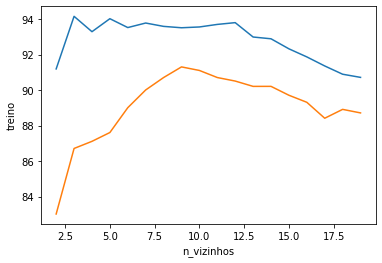

In [37]:
#Aqui imprimimos o gráfico da mudança de desempenho conforme mudamos o numero de vizinhos, para os dados de trino e
#teste
sns.lineplot(x='n_vizinhos', y='treino', data=results_knn)
sns.lineplot(x='n_vizinhos', y='teste', data=results_knn)

In [38]:
# Elencando os melhores valores para n_vizinhos
results_knn.sort_values('teste', ascending=False).head()

,n_vizinhos,treino,teste
7,9,93.517721,91.310891
8,10,93.562141,91.110891
9,11,93.706376,90.711881
6,8,93.595511,90.710891
10,12,93.806265,90.512871


# Melhorando a otimização com exploração aleatória

### Agora a exploração dos hiperparâmetros será em diversos parâmetros simultaneamente

In [45]:
#Varrer todos os hiperparâmetos pode exigir muito processualmente, para isso podemos fazer uma exploração de modo aleatório no modelo
#Com isso podemos encontrar parâmetros que melhor otimizam o modelo usando o RandomizeSearch

espaco_de_parametros_knn= {
    'n_neighbors': randint(5,15), 
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan'],
    'leaf_size': randint(30,120)
}

tic_exploracao = time.time()

busca_knn = RandomizedSearchCV(KNeighborsClassifier(), espaco_de_parametros_knn, n_iter=100,
                                                             cv=cv_knn_skfold, random_state=SEED)
busca_knn.fit(x_normalizado,np.ravel(y))

tac_exploracao = time.time()
tempo_de_exploracao = tac_exploracao-tic_exploracao

print('O tempo para analise exploratória de parâmetros foi de', tempo_de_exploracao,' segundos')

results_knn_randomize = pd.DataFrame(busca_knn.cv_results_)
results_knn_randomize

O tempo para analise exploratória de parâmetros foi de 7.529874086380005  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003091,0.000941,0.003493,0.001496,39,euclidean,9,distance,"{'leaf_size': 39, 'metric': 'euclidean', 'n_ne...",0.891089,...,0.88,0.86,0.90,0.87,0.91,0.90,0.90,0.893109,0.016747,47
1,0.001994,0.000892,0.003192,0.001718,94,euclidean,14,distance,"{'leaf_size': 94, 'metric': 'euclidean', 'n_ne...",0.861386,...,0.89,0.88,0.87,0.90,0.92,0.90,0.93,0.899139,0.022768,25
2,0.001696,0.000640,0.002293,0.000780,59,euclidean,13,distance,"{'leaf_size': 59, 'metric': 'euclidean', 'n_ne...",0.881188,...,0.90,0.88,0.88,0.88,0.92,0.90,0.91,0.895119,0.014197,37
3,0.002693,0.001185,0.008378,0.002646,30,manhattan,13,uniform,"{'leaf_size': 30, 'metric': 'manhattan', 'n_ne...",0.891089,...,0.91,0.89,0.88,0.89,0.91,0.90,0.91,0.897109,0.011814,30
4,0.001994,0.000629,0.002792,0.001075,66,minkowski,9,distance,"{'leaf_size': 66, 'metric': 'minkowski', 'n_ne...",0.881188,...,0.87,0.86,0.88,0.87,0.93,0.88,0.88,0.886119,0.020067,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001696,0.000639,0.006083,0.001509,42,minkowski,7,uniform,"{'leaf_size': 42, 'metric': 'minkowski', 'n_ne...",0.871287,...,0.87,0.84,0.91,0.85,0.90,0.91,0.92,0.885129,0.026857,68
96,0.001396,0.000488,0.002194,0.000746,107,manhattan,10,distance,"{'leaf_size': 107, 'metric': 'manhattan', 'n_n...",0.891089,...,0.90,0.86,0.89,0.86,0.92,0.92,0.90,0.895109,0.020100,40
97,0.001492,0.000495,0.002297,0.000901,86,euclidean,12,distance,"{'leaf_size': 86, 'metric': 'euclidean', 'n_ne...",0.900990,...,0.92,0.86,0.91,0.88,0.92,0.92,0.91,0.903099,0.018452,13
98,0.001306,0.000458,0.002384,0.000493,85,euclidean,13,distance,"{'leaf_size': 85, 'metric': 'euclidean', 'n_ne...",0.881188,...,0.90,0.88,0.88,0.88,0.92,0.90,0.91,0.895119,0.014197,37


In [46]:
#Impressão do melhor modelo knn entre os explorados
melhor_knn=busca_knn.best_estimator_
print(melhor_knn)

KNeighborsClassifier(leaf_size=117, metric='manhattan', n_neighbors=12,
                     weights='distance')


In [47]:
#Função para imprimir o desempenho e os desvios padrões

def imprime_score(scores):
    media=scores.mean()*100
    desvio=scores.std()*100
    print('Acurácia de {0:.2f}'.format(media))
    print('intervalo de confiabilidade é de [{0:.2f},{1:0.2f}]'.format((media-desvio),(media+desvio)))

In [48]:
#avaliando o desempenho do melhor modelo explorado
scores_do_melhor_knn = cross_val_score(melhor_knn,x_normalizado, np.ravel(y), cv=cv_knn_skfold)
imprime_score(scores_do_melhor_knn)

Acurácia de 91.31
intervalo de confiabilidade é de [89.69,92.92]


In [49]:
#Ordenando e visualizando os resultados de todos os modelos gerados

reultados_ordenados_pela_media_knn = results_knn_randomize.sort_values('mean_test_score', ascending=False)
for indice,linha in reultados_ordenados_pela_media_knn.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

91.309 ± 1.614, {'leaf_size': 117, 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
91.110 ± 1.127, {'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
90.909 ± 1.514, {'leaf_size': 115, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
90.811 ± 0.960, {'leaf_size': 41, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
90.610 ± 1.797, {'leaf_size': 113, 'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
90.609 ± 1.802, {'leaf_size': 68, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
90.510 ± 1.357, {'leaf_size': 84, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
90.509 ± 1.860, {'leaf_size': 112, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
90.410 ± 1.958, {'leaf_size': 43, 'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
90.311 ± 1.258, {'leaf_size': 116, 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
90.311 ±

In [50]:
#treinando melhor medelo com todos os dados da base de 10_steps

melhor_knn.fit(x_normalizado,np.ravel(y))

KNeighborsClassifier(leaf_size=117, metric='manhattan', n_neighbors=12,
                     weights='distance')

# Teste usando o melhor classicifador
### Nesse teste pegarei uma outra base de dados com um step diferente e medirei sua precisão

In [51]:
#Importação da base para testes, bases onde o step foi 8
base_teste = pd.DataFrame(pd.read_excel('base_8_steps.xlsm'))

In [52]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,Fcc,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,Fcc,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,Fcc,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,Fcc,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
base_teste['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma+Fcc', 'Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Bcc+Sigma', 'Fcc+Bcc', 'Fcc+Bcc+Sigma', 'Sigma',
       'Bcc', 'MnNi_Beta+Bcc', 'Bcc+Fcc', 'MnNi_Beta+Bcc+Fcc',
       'Bcc+MnNi_Beta+Sigma', 'Bcc+MnNi_Beta', 'Fcc+Sigma+CUB_A13',
       'CUB_A13+Sigma', 'Bcc+Fcc+Sigma'], dtype=object)

In [54]:
# Identificação das fases presentes e substituição na base
valores_de_fase_teste = {
    'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
    'CUB_A13+Sigma+Fcc':3,'Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
    'Sigma+Fcc':3, 'Bcc+Sigma':3, 'Fcc+Bcc':3, 'Fcc+Bcc+Sigma':3, 'Sigma':2,
    'Bcc':1, 'MnNi_Beta+Bcc':3, 'Bcc+Fcc':3, 'MnNi_Beta+Bcc+Fcc':3,
    'Bcc+MnNi_Beta+Sigma':3, 'Bcc+MnNi_Beta':3, 'Fcc+Sigma+CUB_A13':3,
    'CUB_A13+Sigma':3, 'Bcc+Fcc+Sigma':3
}

In [55]:
#Mudando os nomes das fases pelos números correspondentes

base_teste['phase_name'] = base_teste['phase_name'].map(valores_de_fase_teste)

In [56]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Substituição dos dados vazios por zero
base_teste= base_teste.fillna(0)
base_teste.head()


,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,0.0,0.0,0.0,9.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,0.0,0.0,0.0,9.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,0.0,0.0,0.0,8.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,0.0,0.0,0.0,8.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
base_teste.shape

(495, 116)

In [59]:
#Criando bases de Features e Resposta

x_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y_base_teste= base_teste[['phase_name']]

In [60]:
#normalização da base

x_base_teste_normalizado = normalizador.transform(x_base_teste)

In [61]:
#Aplicação do melhor modelo em cima dos dados desconhecidos

previsao_do_melhor_knn = melhor_knn.predict(x_base_teste_normalizado)
acuracia_em_dados_desconhecidos = accuracy_score(y_base_teste, previsao_do_melhor_knn)
print("A acurácia do melhor modelo knn para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos*100))

A acurácia do melhor modelo knn para dados desconhecidos é de 93.33 %


In [62]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos = confusion_matrix(y_base_teste,previsao_do_melhor_knn)
matriz_confusão_desconhecidos

array([[310,   0,   0,   5],
       [  0,  33,   0,   3],
       [  0,   0,   4,  10],
       [ 11,   4,   0, 115]], dtype=int64)

In [76]:
ocorrencia_fases2 = y_base_teste.groupby(['phase_name']).size()
ocorrencia_fases2

phase_name
0    315
1     36
2     14
3    130
dtype: int64

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

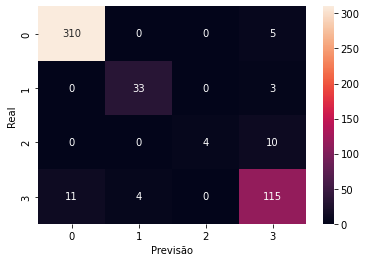

In [79]:
sns.set
mapa_calor_sem_VEC = sns.heatmap(matriz_confusão_desconhecidos, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')
mapa_calor_sem_VEC

## Processo para o melhor modelo knn, utilizando também como feature o VEC


In [41]:
knn

KNeighborsClassifier()

In [65]:
#Aqui como ja temos toda a parte basica, iniciarei pela validação cruzada, com o x_normalizado2

resultados_knn2 = cross_validate(knn, x_normalizado_2, np.ravel(y), cv=10)
resultados_knn2

{'fit_time': array([0.00199866, 0.00398493, 0.00299096, 0.00398731, 0.00299001,
        0.00299215, 0.00498295, 0.00299072, 0.00399137, 0.004987  ]),
 'score_time': array([0.01196766, 0.00897694, 0.00997567, 0.00498581, 0.00897646,
        0.01396537, 0.00898504, 0.0069828 , 0.01096892, 0.00997281]),
 'test_score': array([0.79207921, 0.88      , 0.93      , 0.86      , 0.85      ,
        0.91      , 0.91      , 0.9       , 0.87      , 0.78      ])}

In [66]:
#Agora farei um cálculo da média e desvio padrão com as informações do tes_score
media_knn2 = resultados_knn2['test_score'].mean()
desvio_knn2 = resultados_knn2['test_score'].std()
print('A acurácia utilizando o modelo knn de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_knn2*100
                                                                                        ,desvio_knn2*100))

A acurácia utilizando o modelo knn de decisão foi de 86.82% ± 4.74%


In [67]:
# Agora utilizando um embaralhador para minimizar o fator de aleatóriedade na validação cruzada

cv_knn_skfold2 = StratifiedKFold(n_splits=10,shuffle=True,random_state=112)

# Criação de um Pipeline - primeiro a normalização e em seguida a utilização do modelo
pipeline2 = Pipeline([("normalizacao", normalizador), ("knn", knn)])

resultados_skfold2 = cross_validate(pipeline2, x_2, np.ravel(y), cv=cv_knn_skfold2, return_train_score=False)
media_knn_skfold2 = resultados_skfold2['test_score'].mean()
desvio_knn_skfold2 = resultados_skfold2['test_score'].std()
print('A acurácia utilizando o modelo knn de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_knn_skfold2*100
                                                                                        ,desvio_knn_skfold2*100))


A acurácia utilizando o modelo knn de decisão foi de 93.71% ± 2.78%


#### Otimização do modelo utilizando a base de features com o VEC


In [69]:
# Para otimazação também ja partirei para exploração aleatória ao inves de testar a variação de um único hiperparâmetro

espaco_de_parametros_knn2= {
    'n_neighbors': randint(5,15), 
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan'],
    'leaf_size': randint(30,120)
}

tic_exploracao2 = time.time()

busca_knn2 = RandomizedSearchCV(KNeighborsClassifier(), espaco_de_parametros_knn2, n_iter=100, cv=cv_knn_skfold2,
                                                        random_state=SEED)
busca_knn2.fit(x_normalizado_2,np.ravel(y))

tac_exploracao2 = time.time()
tempo_de_exploracao2 = tac_exploracao2-tic_exploracao2

print('O tempo para analise exploratória de parâmetros foi de', tempo_de_exploracao2,' segundos')

results_knn_randomize2 = pd.DataFrame(busca_knn2.cv_results_)
results_knn_randomize2

O tempo para analise exploratória de parâmetros foi de 7.485992670059204  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004188,0.001882,0.004988,0.002185,39,euclidean,9,distance,"{'leaf_size': 39, 'metric': 'euclidean', 'n_ne...",0.900990,...,0.93,0.93,0.95,0.91,0.97,0.93,0.94,0.936099,0.019924,6
1,0.002593,0.000917,0.003090,0.001132,94,euclidean,14,distance,"{'leaf_size': 94, 'metric': 'euclidean', 'n_ne...",0.891089,...,0.90,0.92,0.91,0.91,0.94,0.92,0.94,0.920109,0.016540,78
2,0.002293,0.000779,0.002993,0.001181,59,euclidean,13,distance,"{'leaf_size': 59, 'metric': 'euclidean', 'n_ne...",0.891089,...,0.91,0.91,0.92,0.91,0.93,0.92,0.94,0.920109,0.015924,78
3,0.004189,0.001246,0.013563,0.007767,30,manhattan,13,uniform,"{'leaf_size': 30, 'metric': 'manhattan', 'n_ne...",0.871287,...,0.92,0.92,0.94,0.89,0.94,0.94,0.94,0.925129,0.024310,73
4,0.002195,0.000401,0.002893,0.001444,66,minkowski,9,distance,"{'leaf_size': 66, 'metric': 'minkowski', 'n_ne...",0.900990,...,0.93,0.93,0.95,0.91,0.97,0.93,0.94,0.936099,0.019924,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001994,0.000438,0.005091,0.000828,42,minkowski,7,uniform,"{'leaf_size': 42, 'metric': 'minkowski', 'n_ne...",0.891089,...,0.92,0.95,0.93,0.93,0.96,0.92,0.94,0.932109,0.020173,33
96,0.001599,0.000491,0.002187,0.000395,107,manhattan,10,distance,"{'leaf_size': 107, 'metric': 'manhattan', 'n_n...",0.900990,...,0.93,0.94,0.92,0.92,0.96,0.94,0.94,0.933099,0.015955,24
97,0.002194,0.000600,0.002693,0.000784,86,euclidean,12,distance,"{'leaf_size': 86, 'metric': 'euclidean', 'n_ne...",0.900990,...,0.92,0.94,0.93,0.91,0.95,0.92,0.94,0.930099,0.015942,55
98,0.001891,0.000530,0.002696,0.000776,85,euclidean,13,distance,"{'leaf_size': 85, 'metric': 'euclidean', 'n_ne...",0.891089,...,0.91,0.91,0.92,0.91,0.93,0.92,0.94,0.920109,0.015924,78


In [70]:
#Impressão do melhor modelo knn entre os explorados
melhor_knn2=busca_knn2.best_estimator_
print(melhor_knn2)

KNeighborsClassifier(leaf_size=96, metric='manhattan', n_neighbors=8,
                     weights='distance')


In [71]:
#avaliando o desempenho do melhor modelo explorado
scores_do_melhor_knn2 = cross_val_score(melhor_knn2,x_normalizado_2, np.ravel(y), cv=cv_knn_skfold2)
imprime_score(scores_do_melhor_knn2)

Acurácia de 94.31
intervalo de confiabilidade é de [92.66,95.96]


In [72]:
#Ordenando e visualizando os resultados de todos os modelos gerados

reultados_ordenados_pela_media_knn2 = results_knn_randomize2.sort_values('mean_test_score', ascending=False)
for indice,linha in reultados_ordenados_pela_media_knn2.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

94.310 ± 1.651, {'leaf_size': 96, 'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
94.011 ± 1.921, {'leaf_size': 107, 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
93.709 ± 1.721, {'leaf_size': 112, 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
93.709 ± 1.721, {'leaf_size': 60, 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
93.709 ± 1.721, {'leaf_size': 78, 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
93.610 ± 1.723, {'leaf_size': 108, 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
93.610 ± 1.723, {'leaf_size': 46, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
93.610 ± 1.992, {'leaf_size': 39, 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
93.610 ± 1.992, {'leaf_size': 66, 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
93.610 ± 1.723, {'leaf_size': 111, 'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}
93.609 ± 1.999, {'

In [73]:
#treinando melhor medelo com todos os dados da base de 10_steps

melhor_knn2.fit(x_normalizado_2,np.ravel(y))

KNeighborsClassifier(leaf_size=96, metric='manhattan', n_neighbors=8,
                     weights='distance')

#### Aplicação do Teste de previsão na base desconhecida

In [74]:
#normalização da base

x_base_teste_normalizado2 = normalizador2.transform(x_2_base_teste)

In [75]:
#Aplicação do melhor modelo encontrado em cima dos dados desconhecidos

previsao_do_melhor_knn2 = melhor_knn2.predict(x_base_teste_normalizado2)
acuracia_em_dados_desconhecidos2 = accuracy_score(y_base_teste, previsao_do_melhor_knn2)
print("A acurácia do melhor modelo knn para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos2*100))

A acurácia do melhor modelo knn para dados desconhecidos é de 94.95 %


In [81]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos2 = confusion_matrix(y_base_teste,previsao_do_melhor_knn2)
matriz_confusão_desconhecidos2

array([[311,   0,   0,   4],
       [  0,  34,   0,   2],
       [  0,   0,   6,   8],
       [  8,   3,   0, 119]], dtype=int64)

In [82]:
#imprimindo a ocorrencia das fases da base desconhecida pelo algoritmo
ocorrencia_fases2

phase_name
0    315
1     36
2     14
3    130
dtype: int64

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

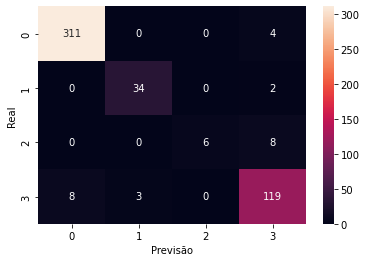

In [83]:
#Imprimindo a matriz de confusão considerando VEC
sns.set
mapa_calor_com_VEC = sns.heatmap(matriz_confusão_desconhecidos2, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')
mapa_calor_com_VEC